## MACS30150 Problem Set 2
## Dr. Richard Evans
### Submitted by Junho Choi

Let us first import the following packages needed for this problem set.

In [2]:
import numpy as np
import scipy.stats as sts
import scipy.optimize as opt
import math
import sympy as sp
import time
from matplotlib import pyplot as plt

### Exercise 1. Numerical Differentiation

#### Problem 1

For this question, I define functions "fn" and "fn_deriv" to represent $f(x) = (\sin(x)+1)^{(\sin(\cos(x))}$ and its derivative; this is shown below.

In [3]:
def fn(x, value_or_not, value = None):
    '''
    representing the function f mentioned above.
    
    inputs:
    - x: vector of strings to represent the input variable
    - value_or_not: False if value of the function needs not
      to be evaluate at some value, True is needs to be
    - value: if None, returns the lambdified function for
      future use, but if some number is given, evaluate the
      function at that value.
      
    returns:
    functional form, lambdified function, or function value
    depending on the inputs.
    
    '''
    
    X = sp.symbols(x)
    base = sp.sin(X) + 1
    expo = sp.sin(sp.cos(X))
    fn_form = base ** expo
    
    if value_or_not:
        f = sp.lambdify(x, fn_form)
        
        if value is None:
            return f
        
        else:
            return f(value)

    else:
        return fn_form

def fn_deriv(x, value_or_not, value = None):
    '''
    derivative of the function f mentioned above.
    
    inputs:
    - x: vector of strings to represent the input variable
    - value_or_not: False if value of the function needs not
      to be evaluate at some value, True is needs to be
    - value: if None, returns the lambdified function for
      future use, but if some number is given, evaluate the
      function at that value.
    
    returns:
    functional form, lambdified function, or function value
    of the derivative of f depending on the inputs.
    
    '''
    
    
    fn_form = sp.diff(fn(x, False))
    
    if value_or_not:
        
        f = sp.lambdify(x, fn_form)
        
        if value is None:
            return f
        else:
            return f(value)

    else:
        return fn_form

Now, we are to plot the functions $f(x)$ and its derivative for the domain $[-\pi, \pi]$. This is shown in the below parts.

In [190]:
pi = math.pi
xval = np.linspace((-1)*pi, pi, 100)
yval_fn = fn('x', True, xval)
yval_fn_deriv = fn_deriv('x', True, xval)

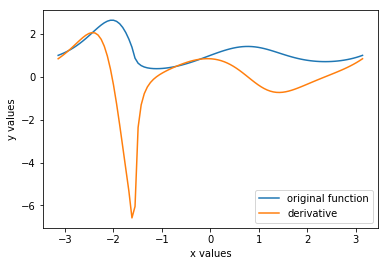

In [191]:
plt.plot(xval, yval_fn, label='original function')
plt.plot(xval, yval_fn_deriv, label='derivative')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()

#### Problem 2

Below functions, from "fwd_1" to "cen_4," represent the six finite difference quotients in Table 8.1.

In [12]:
def fwd_1(f, x, h):
    up = f(x+h) - f(x)
    return up / h

def fwd_2(f, x, h):
    up = (-3)*f(x) + 4*f(x+h) - f(x+(2*h))
    return up / (2*h)

def bwd_1(f, x, h):
    up = f(x) - f(x-h)
    return up / h

def bwd_2(f, x, h):
    up = 3*f(x) - 4*f(x-h) + f(x-(2*h))
    return up / (2*h)

def cen_2(f, x, h):
    up = f(x+h) - f(x-h)
    return up / (2*h)

def cen_4(f, x, h):
    up = f(x-(2*h)) - 8*f(x-h) + 8*f(x+h) - f(x+(2*h))
    return up / (12*h)

To see some difference between each method, I set the value of $h$ to be $h = 0.05$ and plot the graph as shown below. While there certainly is some difference, the overall shapes of the curves indicate that the approximations are more or less close to the actual value (of the derivative).

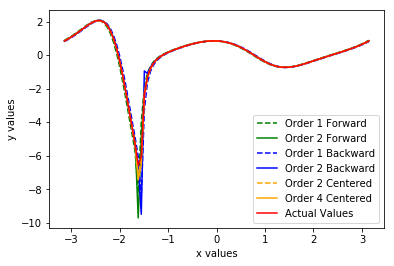

In [194]:
f = fn('x', True)
h = 0.05

yval_fwd_1 = fwd_1(f, xval, h)
yval_fwd_2 = fwd_2(f, xval, h)
yval_bwd_1 = bwd_1(f, xval, h)
yval_bwd_2 = bwd_2(f, xval, h)
yval_cen_2 = cen_2(f, xval, h)
yval_cen_4 = cen_4(f, xval, h)
trueval = fn_deriv('x', True, xval)

plt.plot(xval, yval_fwd_1, color = 'green',
         linestyle = 'dashed', label='Order 1 Forward')
plt.plot(xval, yval_fwd_2, color = 'green',
         label='Order 2 Forward')
plt.plot(xval, yval_bwd_1, color = 'blue',
         linestyle = 'dashed', label='Order 1 Backward')
plt.plot(xval, yval_bwd_2, color = 'blue',
         label='Order 2 Backward')
plt.plot(xval, yval_cen_2, color = 'orange',
         linestyle = 'dashed', label='Order 2 Centered')
plt.plot(xval, yval_cen_4, color = 'orange',
         label='Order 4 Centered')
plt.plot(xval, yval_fn_deriv, color = 'red',
         label='Actual Values')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

### Problem 3

As we had already wrote the function "fn_deriv" to compute the derivative of $f(x)$ at some value $x_0$, I use this function to evaluate $f'(1)$. This is shown to be approximately $-0.3965$.

In [237]:
## setting x0 = 1 as in the problem
func = fn('x', True) ## Lambdified
actual_val = fn_deriv('x', True, 1)
print(actual_val)

-0.3965403874194623


Now let us calculate the absolute errors of the approximations using the aforementioned six methods (from the actual value calculated above) at $x_0 = 1$.

In [271]:
h_arr = np.logspace(-8, 0, 9)

f1 = abs(fwd_1(func, 1, h_arr) - actual_val)
f2 = abs(fwd_2(func, 1, h_arr) - actual_val)
b1 = abs(bwd_1(func, 1, h_arr) - actual_val)
b2 = abs(bwd_2(func, 1, h_arr) - actual_val)
c2 = abs(cen_2(func, 1, h_arr) - actual_val)
c4 = abs(cen_4(func, 1, h_arr) - actual_val)

If plotted (with $h$ on the $x$-axis, absolute error on the $y$-axis), the graph will be as follows.

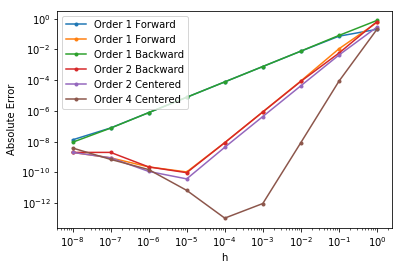

In [277]:
plt.plot(h_arr, f1, label='Order 1 Forward', marker='.')
plt.plot(h_arr, f2, label='Order 1 Forward', marker='.')
plt.plot(h_arr, b1, label='Order 1 Backward', marker='.')
plt.plot(h_arr, b2, label='Order 2 Backward', marker='.')
plt.plot(h_arr, c2, label='Order 2 Centered', marker='.')
plt.plot(h_arr, c4, label='Order 4 Centered', marker='.')
plt.loglog()
plt.legend(loc = 2)
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.show()

### Problem 4

Firstly, I load the required file "plane.npy" to read in the data.

In [228]:
plane = np.load('plane.npy')

array([[ 7.  , 56.25, 67.54],
       [ 8.  , 55.53, 66.57],
       [ 9.  , 54.8 , 65.59],
       [10.  , 54.06, 64.59],
       [11.  , 53.34, 63.62],
       [12.  , 52.69, 62.74],
       [13.  , 51.94, 61.72],
       [14.  , 51.28, 60.82]])

Below function, using the above information in "plane," will approximate the plane speed with forward quotient for $t=7$, backward for $t=14$, and centered for all other $t$. Notice that since we observe the degrees at integer times, $h$ (used for approximation) has to be $h=1$.

In [232]:
def plane_speed(plane):
    '''
    Given list of triple (time, alpha, and beta (latter two being
    in degrees)), returns a tuple of time and speed of a plane.
    
    input:
    plane: list of lists [time, alpha, beta]
    
    output
    tuple of time and speed of a plane at that time
    
    '''
    ## distance between the radars
    a = 500
    
    speed = []
    
    for i, tup in enumerate(plane):
        t, al, be = tup
        al = np.deg2rad(al)
        be = np.deg2rad(be)
        x = a * np.tan(al) / (np.tan(be) - np.tan(al))
        y = x * np.tan(be)
    
        ## forward quotient for time t = 7
        if i == 0:
            tf, alf, bef = plane[i+1]
            alf = np.deg2rad(alf)
            bef = np.deg2rad(bef)
            xf = a * np.tan(alf) / (np.tan(bef) - np.tan(alf))
            yf = x * np.tan(bef)
            
            speed.append([t, ((xf-x)**2 + (yf-y)**2)**0.5])
            
        else:
            tp, alp, bep = plane[i-1]
            alp = np.deg2rad(alp)
            bep = np.deg2rad(bep)
            xp = a * np.tan(alp) / (np.tan(bep) - np.tan(alp))
            yp = x * np.tan(bep)
            
            ## backward quotient for time t = 14
            if i == (len(plane) - 1):
                speed.append([t,((x-xp)**2 + (y-yp)**2)**0.5])
                
            ## centered quotient for time t != 14 or 7
            else:
                tf, alf, bef = plane[i+1]
                alf = np.deg2rad(alf)
                bef = np.deg2rad(bef)
                xf = a * np.tan(alf) / (np.tan(bef) - np.tan(alf))
                yf = x * np.tan(bef)
                
                speed.append([t, (((xf-xp)/2)**2 + ((xf-xp)/2)**2)**0.5])
    
    return speed

Below represents the list of lists showing time and speed at that time together.

In [233]:
plane_speed(plane)

[[7.0, 100.83999912507402],
 [8.0, 64.09715203583406],
 [9.0, 66.86439206122877],
 [10.0, 68.39274812849645],
 [11.0, 65.97444035560711],
 [12.0, 70.28714345819041],
 [13.0, 73.39566035331029],
 [14.0, 92.43996800628017]]

#### Problem 5

The below function "jacobianCalc" uses the second-order centered difference quotient to calculate the Jacobian of some function $f$ at the value $x0$, which $h$ being the distance for approximation.

In [204]:
def jacobianCalc(f, x0, h):
    '''
    Approximates Jacobian of function f at x0 given h.
    
    Inputs:
    f  (function) : function that takes in numerical values,
                    returning numerical values
    x0 (float or lst) : point to be evaluated at
    h  (float) : distance for approximation
    
    Output:

    NumPy array representing the Jacobian matrix
    evaluated at x0 (given h)
    
    '''
    
    jacob_list = []
    len_f, len_x0 = len(f(x0)), len(x0)
    
    x_vec = np.array(x0)
    zero_vec = [0] * len_x0
    
    for i in range(1, len_x0+1):
        basis_vec = zero_vec[:]
        basis_vec[i-1] = 1
        basis_vec = np.array(basis_vec)
        
        up = np.array(f(x0 + h * basis_vec)) - np.array(f(x0 - h * basis_vec)) 
        jacob_list.append(list(up / (2 * h)))

    jacob_list = np.array(jacob_list)
    jacob_list = jacob_list.transpose()
    return jacob_list

To make sure this function works, let us define the below "simple" function $f(x, y)=[x^2, x^3 - y]^T$, and check whether the Jacobian has been produced correctly. We can see that at least for this function, the Jacobian at $(x, y) = (2, 3)$ has been calculated (almost) correctly.

In [205]:
def simple(in_put):
    
    x, y = in_put[0], in_put[1]
    lst = [x ** 2, x ** 3 - y]
    
    return lst

In [206]:
print(jacobianCalc(simple, [2, 3], 0.01))

[[ 4.      0.    ]
 [12.0001 -1.    ]]


#### Problem 7

In the below section, I create a function to create a list of $N$ randomly (and uniformly) drawn values, given some upper and lower bounds.
$-\pi$ to $\pi$.

In [6]:
def rando(N, lb, ub, seed=60637):
    '''
    Returns a list of N randomly and uniformly drawn values from
    [lb, ub].
    
    Inputs:
    lb, ub: lower and upper bounds of the draw
    N: number of draws to be performed
    seed: seed for random and uniform draw
    
    Returns:
    list of N randomly and uniformly drawn values
    
    '''
    
    np.random.seed(seed)
    rand_lst = []
    
    for _ in range(0, N):
        randnum = np.random.random() * (ub - lb) + lb
        rand_lst.append(randnum)

    return rand_lst

In [18]:
from autograd import numpy as anp
from autograd import grad

func = fn('x', True)

def experiment(N, lbub=(-math.pi, math.pi)):
    ## random draws
    xvec = rando(N, lbub[0], lbub[1])
    
    ## using SymPy
    actual_val = []
    sympy_time = []
    for x in xvec:
        start_time = time.clock()
        val = fn_deriv('x', True, x)
        elapsed = time.clock() - start_time
        sympy_time.append(elapsed)
        actual_val.append(val)
    
    actual_val = np.array(actual_val)
    
    ## using centered, order 4
    cen4_val = []
    cen4_time = []
    for x in xvec:
        start_time = time.clock()
        val = cen_4(func, x, 1e-8)
        elapsed = time.clock() - start_time
        cen4_time.append(elapsed)
        cen4_val.append(val)
        
    cen4_val = np.array(cen4_val)
    cen4_error = abs(cen4_val - actual_val)
    
    ## using AutoGrad's grad
    
    for_grad = lambda x: (anp.sin(x) + 1) ** (anp.sin(anp.cos(x)))

    grad_val = []
    grad_time = []
        
    for x in xvec:
        start_time = time.clock()
        grad_diff = grad(for_grad)
        val = grad_diff(x)
        elapsed = time.clock() - start_time
        grad_time.append(elapsed)
        grad_val.append(val)
        
    grad_val = np.array(grad_val)
    grad_error = abs(grad_val - actual_val)
    
    return sympy_time, cen4_time, cen4_error, grad_time, grad_error

In [20]:
sp_t, c4_t, c4_e, gr_t, gr_e = experiment(200)

[]

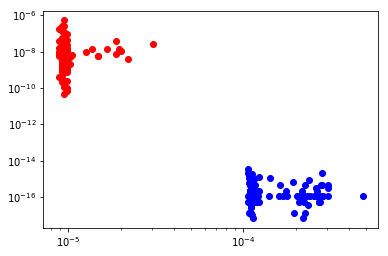

In [28]:
plt.plot(c4_t, c4_e, 'ro')
plt.plot(gr_t, gr_e, 'bo')
plt.loglog()


### Exercise 2. Numerical Integration

#### Problem 2.1

In the parts below, I firstly define the function "g_x" to represent $g(x)$ in the question and function "integr" for evaluting the integral using the three Newton-Cotes methods.

In [104]:
def g_x(x):
    '''
    Function to return the value(s) of g when given input x where
    g is given in the exercise.
    
    input: number, sympy symbol, or vector containing them
    output: evaluated value
    
    '''
    
    return 0.1 * (x**4) - 1.5 * (x**3) + 0.53 * (x**2) + 2 * x + 1

In [105]:
def integr(func, a, b, N, method='midpoint'):
    '''
    Function to return Newton-Cotes approximated values of integration.
    
    inputs:
    func: function to be used in the approximation
    a, b: lower and upper bounds of the integral
    N: number of points used in approximation
    method: a Newton-Cotes method, either midpoint, Simpsons, or
            trapezoid
            
    output:
    approximated integral value
    
    '''
    
    # calculate vector of N + 1 bar bounds
    bin_cuts = np.linspace(a, b, N + 1)
    binsize = (b-a)/N
    
    method = method.lower()
    
    if method == 'midpoint':
        midpoints = bin_cuts[1:] - binsize/2
        mid_vals = func(midpoints) * binsize
        return mid_vals.sum()
    
    elif method == 'trapezoid':
        bin_fvals = func(bin_cuts)
        bin_vals = (bin_fvals[1:] + bin_fvals[0:N]) / 2 * binsize
        return bin_vals.sum()
    
    elif method == 'Simpsons':
        bin_fvals = func(bin_cuts)
        bin_ones = (bin_fvals[1:] + bin_fvals[0:N])
        midpoints = bin_cuts[1:] - binsize/2
        mid_ones = func(midpoints) * 4
        total = bin_ones + mid_ones
        total_vals = total / 6 * binsize
        return total_vals.sum()
    
    else:
        raise ValueError('Method name should either be: Simpsons, trapezoid, or midpoint.')

For demonstration, I set $N=1000$ and present the results below. For my trials, at least, it seems that the Simpson's rule works the best in terms of having the least absolute error.

In [92]:
print("Method: Midpoint")
mid_approx = integr(g_x, -10, 10, 1000, method='midpoint')
abs_error = abs(mid_approx - 4373.33)
print("Approximation:", mid_approx, ";", "Absolute error:", abs_error)
print()
print("Method: Trapezoid")
trap_approx = integr(g_x, -10, 10, 1000, method='trapezoid')
abs_error = abs(trap_approx - 4373.33)
print("Approximation:", trap_approx, ";", "Absolute error:", abs_error)
print()
print("Method: Simpsons")
Simp_approx = integr(g_x, -10, 10, 1000, method='Simpsons')
abs_error = abs(Simp_approx - 4373.33)
print("Approximation:", Simp_approx, ";", "Absolute error:", abs_error)

Method: Midpoint
Approximation: 4373.319646676 ; Absolute error: 0.010353323999879649

Method: Trapezoid
Approximation: 4373.360706656001 ; Absolute error: 0.030706656000802468

Method: Simpsons
Approximation: 4373.333333336001 ; Absolute error: 0.0033333360006508883


#### Problem 2.2

Firstly, I use the fact that $\int_{Z_{min}}^{Z_{max}}f(Z; \mu, \sigma)dZ = F(Z_{max};\mu,\sigma) - F(Z_{min};\mu,\sigma)$ by definition of CDFs. Using this, I write the function "ncNormal" in the below space (for "nc" for Newton-Cotes).

In [121]:
from scipy.stats import norm as nr

def ncNormal(mu, sig, N, k):
    '''
    Given mean and standard deviation of a normal distribution, along with
    the number of nodes (to be equally spaced) and number of standard
    deviations to be away from the mean, returns vector of weights and
    vector of nodes for Newton-Cotes quadrature method.
    
    input:
    mu: mean of the normal distribution
    sig: standard deviation of the normal distribution
    N: number of nodes
    k: number of standard deviations to be away from the mean
    
    output:
    tuple (double) containing
    - vector of nodes
    - vector of weights
    
    '''
    
    # Lower and upper bounds (i.e. furthest nodes)
    lb, ub = mu - sig*k, mu + sig*k
    
    weights = []
    
    nodes = np.linspace(lb, ub, N)
    case_1 = nr.cdf((nodes[0] + nodes[1]) / 2, loc=mu, scale=sig)
    case_N = 1 - nr.cdf((nodes[-1] + nodes[-2]) / 2, loc=mu, scale=sig)
    
    for i in range(1, N+1):
        if i == 1:
            weights.append(case_1)
        elif i == N:
            weights.append(case_N)
        else:
            now = nodes[i-1]
            fwd, bwd = nodes[i], nodes[i-2]
            z_min = (bwd + now) / 2
            z_max = (fwd + now) / 2
            weights.append(nr.cdf(z_max, loc=mu, scale=sig) 
                           - nr.cdf(z_min, loc=mu, scale=sig))
            
    return nodes, weights

To showcase how the above function works, I print the vectors of nodes and weights (for $N=11$) in the code cell below. Note that as the question does not designate the values for $\mu, \sigma, $ and $k$, I have selected the values to be $(\mu, \sigma, k) = (0, 1, 1)$.

In [122]:
tup = ncNormal(0, 1, 11, 1)
nodes, weights = tup
print("Nodes")
print(nodes)
print("Weights")
print(weights)

Nodes
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
Weights
[0.18406012534675947, 0.05790352687631356, 0.0665738865029139, 0.07355103908506044, 0.07808358491192363, 0.07965567455405798, 0.07808358491192369, 0.07355103908506044, 0.06657388650291385, 0.057903526876313505, 0.18406012534675953]


#### Problem 2.3

For this question, I use the "ncNormal" function and build a function called "ncLN" to return the weights and nodes for approximating log-normal distributions. As the question says, it should be that the weights are same, while the nodes are no longer equidistributed.

In [101]:
def ncLN(mu, sig, N, k):
    '''
    Given mean and standard deviation of a normal distribution, along with
    the number of nodes and number of standard deviations to be away from the mean,
    returns vector of weights and vector of nodes for Newton-Cotes quadrature method
    for log-normal distribution.
    
    input:
    mu: mean of the log-normal distribution
    sig: standard deviation of the log-normal distribution
    N: number of nodes
    k: number of standard deviations to be away from the mean
    
    output:
    tuple (double) containing
    - vector of nodes
    - vector of weights
    
    '''
    nodes, weights = ncNormal(mu,sig, N, k)
    nodes = math.e ** (np.array(nodes))
    
    return list(nodes), weights

To showcase how the above function works, I print the vectors of nodes and weights (for $N=11$) in the code cell below. Note that as the question does not designate the values for $\mu, \sigma, $ and $k$, I have selected the values to be $(\mu, \sigma, k) = (0, 1, 1)$.

In [103]:
tup_two = ncLN(0, 1, 11, 1)
nodes, weights = tup_two
print("Nodes")
print(nodes)
print("Weights")
print(weights)

Nodes
[0.36787944117144233, 0.44932896411722156, 0.5488116360940265, 0.6703200460356393, 0.8187307530779819, 1.0, 1.22140275816017, 1.4918246976412706, 1.822118800390509, 2.2255409284924674, 2.718281828459045]
Weights
[0.18406012534675947, 0.05790352687631356, 0.0665738865029139, 0.07355103908506044, 0.07808358491192363, 0.07965567455405798, 0.07808358491192369, 0.07355103908506044, 0.06657388650291385, 0.057903526876313505, 0.18406012534675953]


#### Problem 2.4

I first calculate the true value of the expected income, which is done by using the equation given in the question. The said value turns out to be approximately $50011.087$.

In [137]:
mu = 10.5
sig = 0.8
true_val = math.e ** (mu + (sig ** 2)/2)
print("True value of the expected income:", true_val)

True value of the expected income: 50011.08700852173


Using the above-created function "ncLN", I calculate the approximated value of the expected income. Notice that (as is expected), as I increase the number of standard deviations away from the mean, the value of approximated expected income approaches the "true" value of (approximately) $50011.087$.

In [136]:
k = 1
print('Standard deviations away from mean:', k)
nodes, weights = ncLN(mu, sig, 1001, k)
nodes = np.array(nodes)
weights = np.array(weights)
print('Approximated income:', np.sum(nodes * weights))
print()
k += 2
print('Standard deviations away from mean:', k)
nodes, weights = ncLN(mu, sig, 1001, k)
nodes = np.array(nodes)
weights = np.array(weights)
print('Approximated income:', np.sum(nodes * weights))
print()
k += 2
print('Standard deviations away from mean:', k)
nodes, weights = ncLN(mu, sig, 1001, k)
nodes = np.array(nodes)
weights = np.array(weights)
print('Approximated income:', np.sum(nodes * weights))

Standard deviations away from mean: 1
Approximated income: 42584.14993403733

Standard deviations away from mean: 3
Approximated income: 49857.01956706324

Standard deviations away from mean: 5
Approximated income: 50011.12133005334


#### Problem 3.1

Since there are $N=3$ nodes, we have to solve a system of six equations that are as follows, for $j\in\{0, 1, ..., 5\}$
\begin{equation}
\int_a^b x^j dx = \omega_1x^j_1 + \omega_2x^j_2 + \omega_3x^j_2
\end{equation}
where we know that
\begin{equation}
\int_a^b x^j dx = \frac{b^{j+1}}{j+1} - \frac{a^{j+1}}{j+1}
\end{equation}
from integration of polynomials (when $a, b \in \mathbb{R}$). Let us first represent the system using the below function. Note that for our question, $(a, b) = (-10, 10)$.

In [154]:
def gauss_quad(V, a, b):
    '''
    Calculating the system of equations to be solved for
    finding the nodes and weights of integrating with
    respect to Gaussian quadrature.
    
    inputs:
    V: vector of weights and nodes to be used for Gaussian
       quadrature approximation   
    a, b: lower and upper bound for integration
    
    returns:
    list containing system of equations
    
    '''
    
    N = int(len(V) / 2)
    if N % 2 == 1:
        raise ValueError()
    
    wgt = np.array(V[0:N])
    nod = np.array(V[N:])
    
    system = []
    for j in range(0, 2*N):
        RHS = wgt * (nod ** j)
        RHS = np.sum(RHS)
        LHS = (b ** (j+1) - a ** (j+1)) / (j+1)
        system.append(RHS - LHS)
    
    return system

To exhibit that the above function has represented the system well, I print the system where $N=3$ as said in the question.

In [158]:
w1, w2, w3 = sp.symbols('w1'), sp.symbols('w2'), sp.symbols('w3')
x1, x2, x3 = sp.symbols('x1'), sp.symbols('x2'), sp.symbols('x3')
result = gauss_quad([w1, w2, w3, x1, x2, x3], -10, 10)
for i in result:
    print(i)

w1 + w2 + w3 - 20.0
w1*x1 + w2*x2 + w3*x3
w1*x1**2 + w2*x2**2 + w3*x3**2 - 666.666666666667
w1*x1**3 + w2*x2**3 + w3*x3**3
w1*x1**4 + w2*x2**4 + w3*x3**4 - 40000.0
w1*x1**5 + w2*x2**5 + w3*x3**5


Now let us observe the approximated value using the Gaussian quadrature method. We can see that the approximated value is very close to the actual value.

In [186]:
## lambdifying the prev. function
func = lambda x: gauss_quad(x, -10, 10)

## approximation of the integrated value
initial_guess = [0.5, 1, 0.5, -5, 0, 5]
vector = opt.root(func, initial_guess).x
N = len(vector)
weights = np.array(vector[0:int(N/2)])
nodes = np.array(vector[int(N/2):])
approximation = np.sum(g_x(nodes) * weights)
print("Approximated value using Gaussian quadrature:", approximation)

Approximated value using Gaussian quadrature: 4373.333333321805


#### Problem 3.2

Compared to the result in exercise 3.2, we do notice that the below approximation is closer to the exact value of the integral than the previous one. While the difference between the two methods is subtle and minute at best, one may argue that the below method is superior as errors may accumulate when using a certain method multiple times.

In [185]:
from scipy import integrate as itg

val, s = itg.quad(g_x, -10, 10)
print("Approximated value using scipy.integrate:", val)

Approximated value using scipy.integrate: 4373.333333333334


#### Problem 4.1

Firstly, I wrote a function "inCircle" that will determine how many points will be in the circle with radius 1 and center (0, 0). This is shown below.

In [3]:
def inCircle(x, y):
    '''
    Given coordinates x and y, determines whether the said coordinates
    are within the circle of radius 1 and center point (0, 0).
    
    Inputs:
    x, y: x and y coordinates (either float/int or unidimensional
          numpy arrays) that are within the domain ([-1, 1], [-1, 1])
    
    Returns:
    Number of points within the said circle (int)
    
    '''
    addup = x**2 + y**2
    checker = addup <= 1
    
    return np.sum(checker)

Next, I came up with a function "pi_approx" that will return the closest approximation to 3.1415 (and the number of points used for the said approximation). This is shown below.

In [4]:
def pi_approx(error, inc_by, whatseed=25):
    '''
    Approximating the closest number to pi (or 3.1415 in this case)
    and returning how many points are required to do so as well
    
    Inputs:
    error (float): boundary of error approximation
    inc_by (int): increment for the number of points used for
                  approximation
    whatseed (int): seed used for 
    
    Returns:
    A tuple that contains the following information - (1) closest
    approximation to 3.1415 (to the fourth digit of pi) that is
    within the set error and (2) the number of points needed to
    reach such an approximation
    
    '''

    N = inc_by
    cont = True
    while cont:
        np.random.seed(seed=whatseed)
        x = sts.uniform.rvs(size=N, loc=-1, scale=2)
        y = sts.uniform.rvs(size=N, loc=-1, scale=2)
        
        piApprox = inCircle(x, y) / N * 4
        
        if abs(piApprox - 3.1415) < error:
            return piApprox, N
            cont = False
        
        else:
            N = N + inc_by

Now, let us find the smallest number of random draws needed to create an approximation that matches $pi$ to the 4th decimal, as the question says. As seen below, if the increments are 1 each, then we require 657 points (random draws). However, I do note that this may have been the result of pure chance. That is, the absolute errors (from our approximations to 3.1415) are not necessarily decreasing as the draw numbers are increasing in this case. In fact, if increments are 10s instead of ones, one requires much more random draws (5340 points) than 657.

In [57]:
piapprox = pi_approx(0.0001, 1)
print('Increments: 1')
print("Closest approximation:", piapprox[0], ";", 
      "Number of draws needed:", piapprox[1])
print()
piapprox2 = pi_approx(0.0001, 10)
print('Increments: 10')
print("Closest approximation:", piapprox2[0], ";", 
      "Number of draws needed:", piapprox2[1])

Increments: 1
Closest approximation: 3.141552511415525 ; Number of draws needed: 657

Increments: 10
Closest approximation: 3.141573033707865 ; Number of draws needed: 5340


#### Problem 4.2

Firstly, I borrow functions "isPrime" and "primes_ascend" from Evans (2019) which are written below. These functions will be necessary for the construction of function "equidistr_nth" which will be used to complete the task given by the exercise.

In [7]:
def isPrime(n):
    '''
    --------------------------------------------------------------------
    This function returns a boolean indicating whether an integer n is a
    prime number
    --------------------------------------------------------------------
    INPUTS:
    n = scalar, any scalar value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    i = integer in [2, sqrt(n)]

    FILES CREATED BY THIS FUNCTION: None

    RETURN: boolean
    --------------------------------------------------------------------
    '''
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False

    return True

def primes_ascend(N, min_val=2):
    '''
    --------------------------------------------------------------------
    This function generates an ordered sequence of N consecutive prime
    numbers, the smallest of which is greater than or equal to 1 using
    the Sieve of Eratosthenes algorithm.
    (https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
    --------------------------------------------------------------------
    INPUTS:
    N       = integer, number of elements in sequence of consecutive
              prime numbers
    min_val = scalar >= 2, the smallest prime number in the consecutive
              sequence must be greater-than-or-equal-to this value

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        isPrime()

    OBJECTS CREATED WITHIN FUNCTION:
    primes_vec     = (N,) vector, consecutive prime numbers greater than
                     min_val
    MinIsEven      = boolean, =True if min_val is even, =False otherwise
    MinIsGrtrThn2  = boolean, =True if min_val is
                     greater-than-or-equal-to 2, =False otherwise
    curr_prime_ind = integer >= 0, running count of prime numbers found

    FILES CREATED BY THIS FUNCTION: None

    RETURN: primes_vec
    --------------------------------------------------------------------
    '''
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2

    return primes_vec

In the sections below, I define the function "get_frac_part" which returns (an array or float showing) the fractional parts of numbers. The function "equidistr_nth" returns the $n$th element of a $d$-dimensional equidistributed sequence. I note that since Baker sequence, as defined in Evans (2019), tells us that it should be a sequence whose $n$th element (for $d$-dimensions) is $(\langle ne^{r_1}\rangle,\ldots,\langle ne^{r_d}\rangle)$ and the sequence $\{r_i\}_{i=1}^{d}$ simply needs to be rational and distinct. As such, I define $r_i = i$ for $i\in \mathbb{N}$ as all natural numbers are distinct to one another and rational.

In [26]:
def get_frac_part(x):
    '''
    Returns the fractional part of numbers.
    
    Input:
    - x (float or numpy array of floats): numbers to
      return the frational parts from.
    
    Returns:
    - fractional parts of numbers.
    
    '''
    
    int_part = np.floor(x)
    return x - int_part

In [51]:
def equidistr_nth(n, d, seq_type='niederreiter'):
    '''
    Returns the 'n'th element of a 'd'-dimensional equidistributed
    sequence, in which the sequence is either a Haber, Weyl,
    Niederreiter, or Baker sequence. Default is set to be
    Niederreiter.
    
    Inputs:
    n (int): the index of element to be returned from this function
    d (int): dimension of the equidistributed sequence
    seq_type (str): name of the sequence to be used
    
    Returns:
    the nth element of the d-dimensional equidistributed sequence
    that was specified from the function
    
    '''
    
    ## To avoid errors when someone puts in sequence names
    ## in capital letters (e.g. 'BAKER', 'Niederreiter')
    seq_type = seq_type.lower()
    
    ## Haber or Weyl
    if seq_type == 'weyl' or seq_type == 'haber':
        sequence_prime_sqrt = np.array(primes_ascend(d)) ** 0.5
        weyl_prep = n * sequence_prime_sqrt
        
        ## Weyl
        if seq_type == 'weyl':
            return get_frac_part(weyl_prep)
            
        ## Haber
        else:
            haber_prep = weyl_prep * (n+1) / 2
            return get_frac_part(haber_prep)
    
    ## Niederreiter or Baker
    elif seq_type == 'niederreiter' or seq_type == 'baker':
        expo = np.array(range(0, d)) + 1
        
        ## Niederreiter
        if seq_type == 'niederreiter':
            expo = expo / (n+1)
            return get_frac_part(n * (2 ** expo))
        
        ## Baker
        else:
            return get_frac_part(n * (math.e ** expo))
    
    ## If something else is put in, raise errors!
    else:
        raise ValueError('Sequence name should either be: niederreiter, haber, weyl, or baker.')

To give examples of how this function works, I provide some test results below.

In [55]:
print(equidistr_nth(15, 6))
print(equidistr_nth(15, 6, seq_type='haber'))
print(equidistr_nth(12, 6, seq_type='Baker'))
print(equidistr_nth(4, 4, seq_type='WEYL'))
print(equidistr_nth(4, 3, seq_type='no clue'))

[0.66410674 0.35761599 0.08182952 0.83810673 0.62786718 0.45259332]
[0.70562748 0.84609691 0.3281573  0.49015733 0.99497484 0.66615306]
[0.61938194 0.66867319 0.02644308 0.1778004  0.95790923 0.14552191]
[0.65685425 0.92820323 0.94427191 0.58300524]


ValueError: Sequence name should either be: niederreiter, haber, weyl, or baker.

#### Problem 4.3

In [81]:
def pi_approx_equi(error, inc_by, seq_type='niederreiter'):
    
    N = inc_by
    cont = True
    point_in_circle = 0
    
    while cont:
        x, y = (2 * equidistr_nth(N, 2, seq_type)) - 1
        if inCircle(x, y):
            point_in_circle += 1
        
        piApprox = point_in_circle / N * 4
        
        if abs(piApprox - 3.1415) < error:
            return piApprox, N
            cont = False
        
        else:
            N = N + inc_by

From the below results, it is seen that the draws from equidistributed sequences such as Haber, Weyl, or Baker require more points than $N=657$, which was the result from Monte Carlo simulation. However, I have noted previously that the number $N=657$ may have been purely due to chance; therefore, it is likely that there are cases in which quasi-Monte Carlo simulations have advantage over the plain Monte Carlo simulations. I also note that the test with Niederreiter sequence has been dropped due to runtime issues.


In [83]:
piapprox_hab = pi_approx_equi(0.0001, 1, 'haber')
print('Distribution: Haber')
print("Closest approximation:", piapprox_hab[0], ";", 
      "Number of draws needed:", piapprox_hab[1])
print()
piapprox_weyl = pi_approx_equi(0.0001, 1, 'weyl')
print('Distribution: Weyl')
print("Closest approximation:", piapprox_weyl[0], ";", 
      "Number of draws needed:", piapprox_weyl[1])
print()
piapprox_baker = pi_approx_equi(0.0001, 1, 'baker')
print('Distribution: Baker')
print("Closest approximation:", piapprox_baker[0], ";", 
      "Number of draws needed:", piapprox_baker[1])

Distribution: Haber
Closest approximation: 3.1414821944177094 ; Number of draws needed: 2078

Distribution: Weyl
Closest approximation: 3.141585040071238 ; Number of draws needed: 1123

Distribution: Baker
Closest approximation: 3.1414141414141414 ; Number of draws needed: 792
